In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

df = pd.read_csv('DataForCluster.csv') # Processed data
df
df['Attack'].value_counts()


Malware                                                        663
Account Hijacking                                              329
Unknown                                                        317
Malware/PoS Malware                                            101
Account Takeover                                                87
                                                              ... 
MyBB vulnerability                                               1
Unauthorized Raspberry Pi                                        1
Spam                                                             1
Malicious Javascript Injection                                   1
CVE-2018-13379, CVE-2020-12812, CVE-2019-5591 vulnerability      1
Name: Attack, Length: 106, dtype: int64

In [143]:
def subAttack(row):  
    if "multiple" in str(row['Attack']).lower():
        return 'Multiple'
    elif ">1" in str(row['Attack']).lower():
        return 'Multiple'
    elif "vulnerabilit" in str(row['Attack']).lower():
        return 'Vulnerability'
    elif "unsecured" in str(row['Attack']).lower():
        return'Vulnerability'
    elif "unauthorize" in str(row['Attack']).lower():
        return 'Vulnerability'
    elif "cve" in str(row['Attack']).lower():
        return 'Vulnerability'
    elif "defacement" in str(row['Attack']).lower():
        return 'Vulnerability'
    elif "misconfig" in str(row['Attack']).lower():
        return 'Misconfiguration'
    elif "hijack" in str(row['Attack']).lower():
        return 'Hijacking'
    elif "redirection" in str(row['Attack']).lower():
        return 'Hijacking'
    elif "account takeover" in str(row['Attack']).lower():
        return 'Identity theft'
    elif "swap" in str(row['Attack']).lower():
        return 'Identity theft'
    elif "malware" in str(row['Attack']).lower():
        return 'Malware'
    elif "attack" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "bombing" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "ddos" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "sextortion attack" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "targeted attack" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "remote" in str(row['Attack']).lower():
        return 'Targeted attack'
    elif "malware" in str(row['Attack']).lower():
         return 'Malware'
    elif "injection" in str(row['Attack']).lower():
        return 'Malware'
    elif "malvertising" in str(row['Attack']).lower():
        return 'Malware'
    elif "ad" in str(row['Attack']).lower():
        return 'Malware'
    elif "bot" in str(row['Attack']).lower():
        return 'Bot attack'
    elif "robocalls" in str(row['Attack']).lower():
        return 'Bot attack'
    elif "stuffing" in str(row['Attack']).lower():
        return 'Brute force attack'
    elif "password" in str(row['Attack']).lower():
        return 'Brute force attack'
    elif "spam" in str(row['Attack']).lower():
        return 'Scam'
    elif "bec" in str(row['Attack']).lower():
        return 'Scam'
    elif "fake" in str(row['Attack']).lower():
        return 'Scam'
    elif "business email compromise" in str(row['Attack']).lower():
        return 'Scam'
    elif "unknown" in str(row['Attack']).lower():
        return 'Other'
    elif "nan" in str(row['Attack']).lower():
        return 'Other'

df['subAttack'] = df.apply(subAttack, axis=1)
df

,Unnamed: 0,Attack,Month,deciMonth,subAttack
0,1,Unknown,10,9.032258,Other
1,3,Malware/PoS Malware,10,9.064516,Malware
2,5,Malware/PoS Malware,10,9.064516,Malware
3,9,Targeted Attack,10,9.096774,Targeted attack
4,12,Account Hijacking,10,9.096774,Hijacking
...,...,...,...,...,...
1960,1314,Malware,5,4.322581,Malware
1961,1318,Misconfiguration,5,4.354839,Misconfiguration
1962,1323,Malware,5,4.387097,Malware
1963,1331,Malware,5,4.419355,Malware


In [144]:
#Complete
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle.subAttack=le.fit_transform(dfle.subAttack)
dfle.deciMonth=le.fit_transform(dfle.deciMonth)
dfle

,Unnamed: 0,Attack,Month,deciMonth,subAttack
0,1,Unknown,10,295,7
1,3,Malware/PoS Malware,10,296,4
2,5,Malware/PoS Malware,10,296,4
3,9,Targeted Attack,10,297,9
4,12,Account Hijacking,10,297,2
...,...,...,...,...,...
1960,1314,Malware,5,152,4
1961,1318,Misconfiguration,5,153,5
1962,1323,Malware,5,154,4
1963,1331,Malware,5,155,4


Text(0, 0.5, 'Attack')

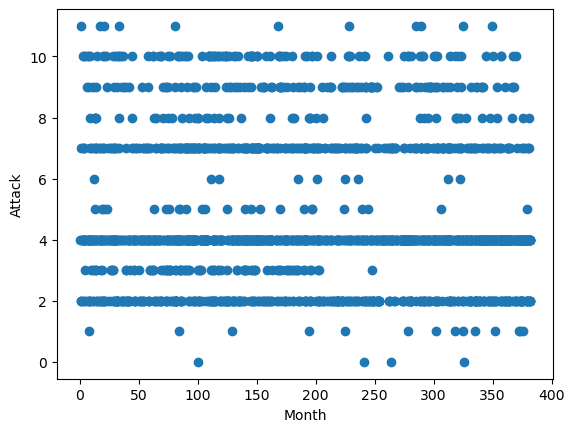

In [148]:
plt.scatter(df['deciMonth'], df['subAttack'])
plt.xlabel('Month')
plt.ylabel('Attack')

In [146]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [147]:
y_predicted=km.fit_predict(df[['subAttack', 'deciMonth']]) #predict data frame excluding month
y_predicted #
df.head()

,Unnamed: 0,Attack,Month,deciMonth,subAttack
0,1,Unknown,10,295,7
1,3,Malware/PoS Malware,10,296,4
2,5,Malware/PoS Malware,10,296,4
3,9,Targeted Attack,10,297,9
4,12,Account Hijacking,10,297,2


In [124]:
df['cluster']=y_predicted
df

,Unnamed: 0,Attack,Month,deciMonth,subAttack,cluster
0,1,Unknown,10,295,7,3
1,3,Malware/PoS Malware,10,296,4,3
2,5,Malware/PoS Malware,10,296,4,3
3,9,Targeted Attack,10,297,9,3
4,12,Account Hijacking,10,297,2,3
...,...,...,...,...,...,...
1960,1314,Malware,5,152,4,2
1961,1318,Misconfiguration,5,153,5,2
1962,1323,Malware,5,154,4,2
1963,1331,Malware,5,155,4,2


No handles with labels found to put in legend.


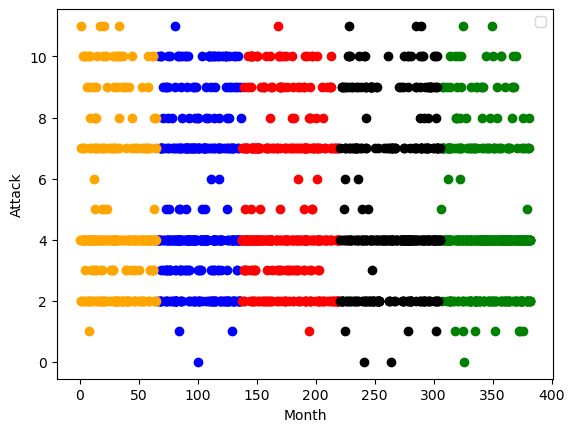

In [125]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
#df6=df[df.cluster==5]
#df7=df[df.cluster==6]
#df8=df[df.cluster==7]
#df9=df[df.cluster==8]
#df10=df[df.cluster==9]
#df11=df[df.cluster==10]
#df12=df[df.cluster==11]
plt.scatter(df1.deciMonth,df1['subAttack'],color='green')
plt.scatter(df2.deciMonth,df2['subAttack'],color='blue')
plt.scatter(df3.deciMonth,df3['subAttack'],color='red')
plt.scatter(df4.deciMonth,df4['subAttack'],color='black')
plt.scatter(df5.deciMonth,df5['subAttack'],color='orange')
#plt.scatter(df6.deciMonth,df6['subAttack'],color='yellow')
#plt.scatter(df7.deciMonth,df7['subAttack'],color='purple')
#plt.scatter(df8.deciMonth,df8['subAttack'],color='brown')
#plt.scatter(df9.deciMonth,df9['subAttack'],color='cyan')
#plt.scatter(df10.deciMonth,df10['subAttack'],color='gray')
#plt.scatter(df11.deciMonth,df11['subAttack'],color='lightgreen')
#plt.scatter(df12.deciMonth,df12['subAttack'],color='pink')

plt.xlabel('Month')
plt.ylabel('Attack')
plt.legend()
plt.show()

In [131]:
scaler=MinMaxScaler()
scaler.fit(df[['deciMonth']])
df['deciMonth']=scaler.transform(df['deciMonth'].to_numpy().reshape(-1,1))

scaler.fit(df[['subAttack']])
df['subAttack']=scaler.transform(df['subAttack'].to_numpy().reshape(-1,1))
df

,Unnamed: 0,Attack,Month,deciMonth,subAttack,cluster
0,1,Unknown,10,0.772251,0.636364,3
1,3,Malware/PoS Malware,10,0.774869,0.363636,1
2,5,Malware/PoS Malware,10,0.774869,0.363636,1
3,9,Targeted Attack,10,0.777487,0.818182,3
4,12,Account Hijacking,10,0.777487,0.181818,11
...,...,...,...,...,...,...
1960,1314,Malware,5,0.397906,0.363636,5
1961,1318,Misconfiguration,5,0.400524,0.454545,5
1962,1323,Malware,5,0.403141,0.363636,5
1963,1331,Malware,5,0.405759,0.363636,5


In [149]:
km=KMeans(n_clusters=5)
y_predicted=km.fit_predict(df[['deciMonth', 'subAttack']])
y_predicted

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [150]:
df['cluster']=y_predicted
df

,Unnamed: 0,Attack,Month,deciMonth,subAttack,cluster
0,1,Unknown,10,295,7,1
1,3,Malware/PoS Malware,10,296,4,1
2,5,Malware/PoS Malware,10,296,4,1
3,9,Targeted Attack,10,297,9,1
4,12,Account Hijacking,10,297,2,1
...,...,...,...,...,...,...
1960,1314,Malware,5,152,4,4
1961,1318,Misconfiguration,5,153,5,4
1962,1323,Malware,5,154,4,4
1963,1331,Malware,5,155,4,4


No handles with labels found to put in legend.


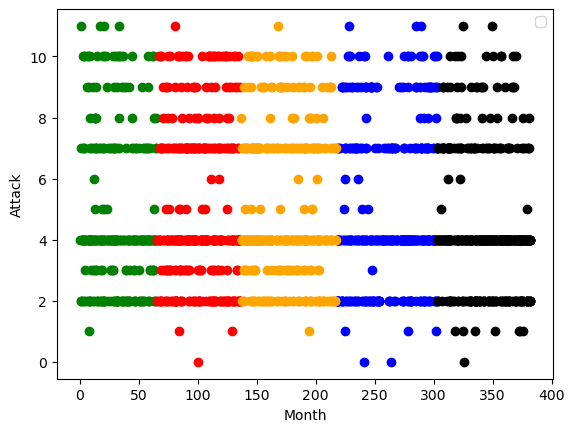

In [151]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
#df6=df[df.cluster==5]
#df7=df[df.cluster==6]
#df8=df[df.cluster==7]
#df9=df[df.cluster==8]
#df10=df[df.cluster==9]
#df11=df[df.cluster==10]
#df12=df[df.cluster==11]
plt.scatter(df1.deciMonth,df1['subAttack'],color='green')
plt.scatter(df2.deciMonth,df2['subAttack'],color='blue')
plt.scatter(df3.deciMonth,df3['subAttack'],color='red')
plt.scatter(df4.deciMonth,df4['subAttack'],color='black')
plt.scatter(df5.deciMonth,df5['subAttack'],color='orange')
#plt.scatter(df6.deciMonth,df6['subAttack'],color='yellow')
#plt.scatter(df7.deciMonth,df7['subAttack'],color='purple')
#plt.scatter(df8.deciMonth,df8['subAttack'],color='brown')
#plt.scatter(df9.deciMonth,df9['subAttack'],color='cyan')
#plt.scatter(df10.deciMonth,df10['subAttack'],color='gray') #sorry for the not-so-good color choices
#plt.scatter(df11.deciMonth,df11['subAttack'],color='lightgreen')
#plt.scatter(df12.deciMonth,df12['subAttack'],color='pink')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='maroon', marker='X', label='centroid') #plot centroids

plt.xlabel('Month')
plt.ylabel('Attack')
plt.legend()

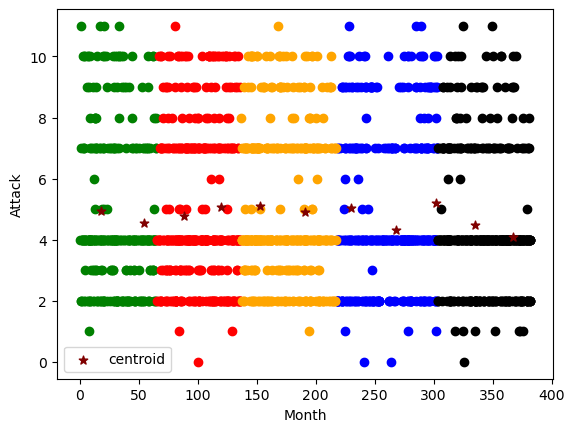

In [155]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1.deciMonth,df1['subAttack'],color='green')
plt.scatter(df2.deciMonth,df2['subAttack'],color='blue')
plt.scatter(df3.deciMonth,df3['subAttack'],color='red')
plt.scatter(df4.deciMonth,df4['subAttack'],color='black')
plt.scatter(df5.deciMonth,df5['subAttack'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='maroon', marker='*', s=40, label='centroid') #plot centroids

plt.xlabel('Month')
plt.ylabel('Attack')
plt.legend()

In [153]:
km.cluster_centers_

array([[ 30.86928105,   4.73202614],
       [262.98441558,   4.88051948],
       [100.79245283,   4.92924528],
       [344.42093541,   4.37861915],
       [172.9276808 ,   5.01745636]])

In [154]:
k_rng=range(1,12)
sse=[] #sum of squared error
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['deciMonth', 'subAttack']]) #try to fit dataframe
    sse.append(km.inertia_)
sse

[24979213.92875319,
 5795898.949267177,
 2655210.3290910064,
 1562722.2009688497,
 990613.9534829808,
 640461.7517448278,
 471369.1814827122,
 379676.47667948,
 290282.8034513499,
 245371.78055701495,
 200567.60424273697]

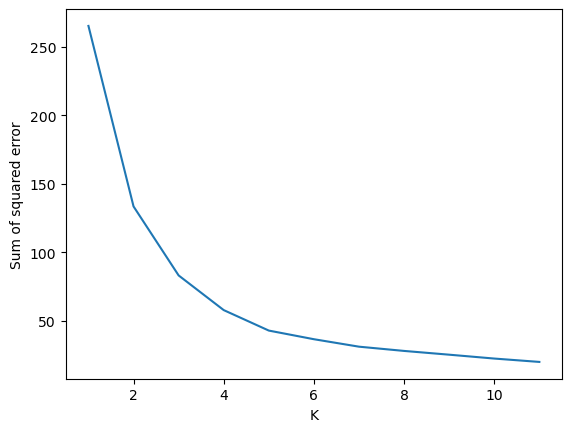

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse) #to find optimal number of k clusters

In [4]:
kMeans.inertia_

NameError: name 'kMeans' is not defined